# Exploratory data analysis

EDA of dataframe created by handling missing values from the original dataset

Importing modules and loading datasets

In [47]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn import svm
from sklearn.feature_selection import SelectKBest, mutual_info_classif
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score, classification_report, accuracy_score, confusion_matrix
from sklearn.ensemble import GradientBoostingClassifier, RandomForestClassifier
from sklearn.metrics import roc_auc_score,roc_curve
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from imblearn.over_sampling import SMOTE

import warnings

warnings.filterwarnings('ignore')

sns.set_theme(context='notebook',style='darkgrid',palette='pastel')

In [2]:
df = pd.read_csv('../data/interim/clean.csv')

In [3]:
df.head()

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1,39,4.0,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,0,46,2.0,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,1,48,1.0,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0
3,0,61,3.0,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,1
4,0,46,3.0,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0,0


In [4]:
df.describe()

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
count,3989.000000,3989.000000,3989.000000,3989.000000,3989.000000,3989.000000,3989.000000,3989.000000,3989.000000,3989.000000,3989.000000,3989.000000,3989.000000,3989.000000,3989.000000,3989.000000
mean,0.433191,49.473803,1.982452,0.491101,8.504888,0.029331,0.005515,0.309601,0.025320,235.741038,131.651416,82.678616,25.650541,75.772123,80.026410,0.149160
std,0.495579,8.532381,1.020695,0.499983,10.597084,0.168753,0.074068,0.462387,0.157114,39.279071,19.338250,10.438553,3.466154,10.704613,11.492301,0.356291
min,0.000000,32.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,170.000000,104.000000,66.000000,20.060000,60.000000,62.000000,0.000000
25%,0.000000,42.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,206.000000,117.000000,75.000000,23.060000,68.000000,72.000000,0.000000
50%,0.000000,49.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,234.000000,128.000000,82.000000,25.380000,75.000000,79.000000,0.000000
75%,1.000000,56.000000,3.000000,1.000000,20.000000,0.000000,0.000000,1.000000,0.000000,263.000000,143.500000,89.500000,27.990000,83.000000,85.000000,0.000000
max,1.000000,70.000000,4.000000,1.000000,30.000000,1.000000,1.000000,1.000000,1.000000,312.000000,175.000000,104.500000,32.760000,98.000000,107.000000,1.000000


## Univariate analysis

I already made some univariate analysis in the data preparation notebook but I will do some more in this notebook since there's some modifications previously made in the data.

### Distribution of the target variable (TenYearCHD)

<Axes: xlabel='TenYearCHD', ylabel='count'>

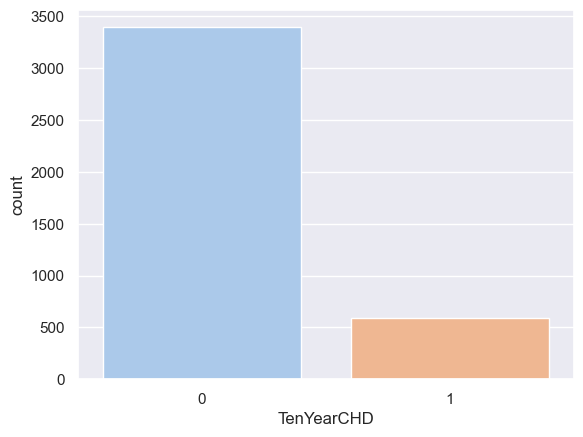

In [5]:
sns.countplot(df,x='TenYearCHD')

The target variable TenYearCHD is very imbalanced. So probably we'll need to oversample for the prediction model to accurately work.

Let's see how much unbalanced the data is.

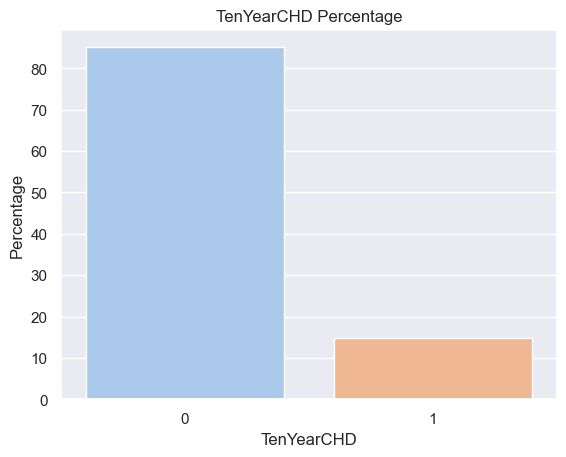

In [6]:
TenYearCHD_percentage = df['TenYearCHD'].value_counts(normalize=True)*100
sns.barplot(x=TenYearCHD_percentage.index,y=TenYearCHD_percentage.values)
plt.xlabel('TenYearCHD')
plt.ylabel('Percentage')
plt.title('TenYearCHD Percentage')
plt.show()

In [7]:
#Let's see in numbers how much is imbalanced the dataset.
classes_count = df['TenYearCHD'].value_counts()
classes_count[0]/classes_count[1]

5.704201680672269

There's a ratio of approximately 5:1

### Distribution of others variables.

Since some data is binary and some is continuous we need to show first the binary variables as countplots and then the continuous variables as histograms.

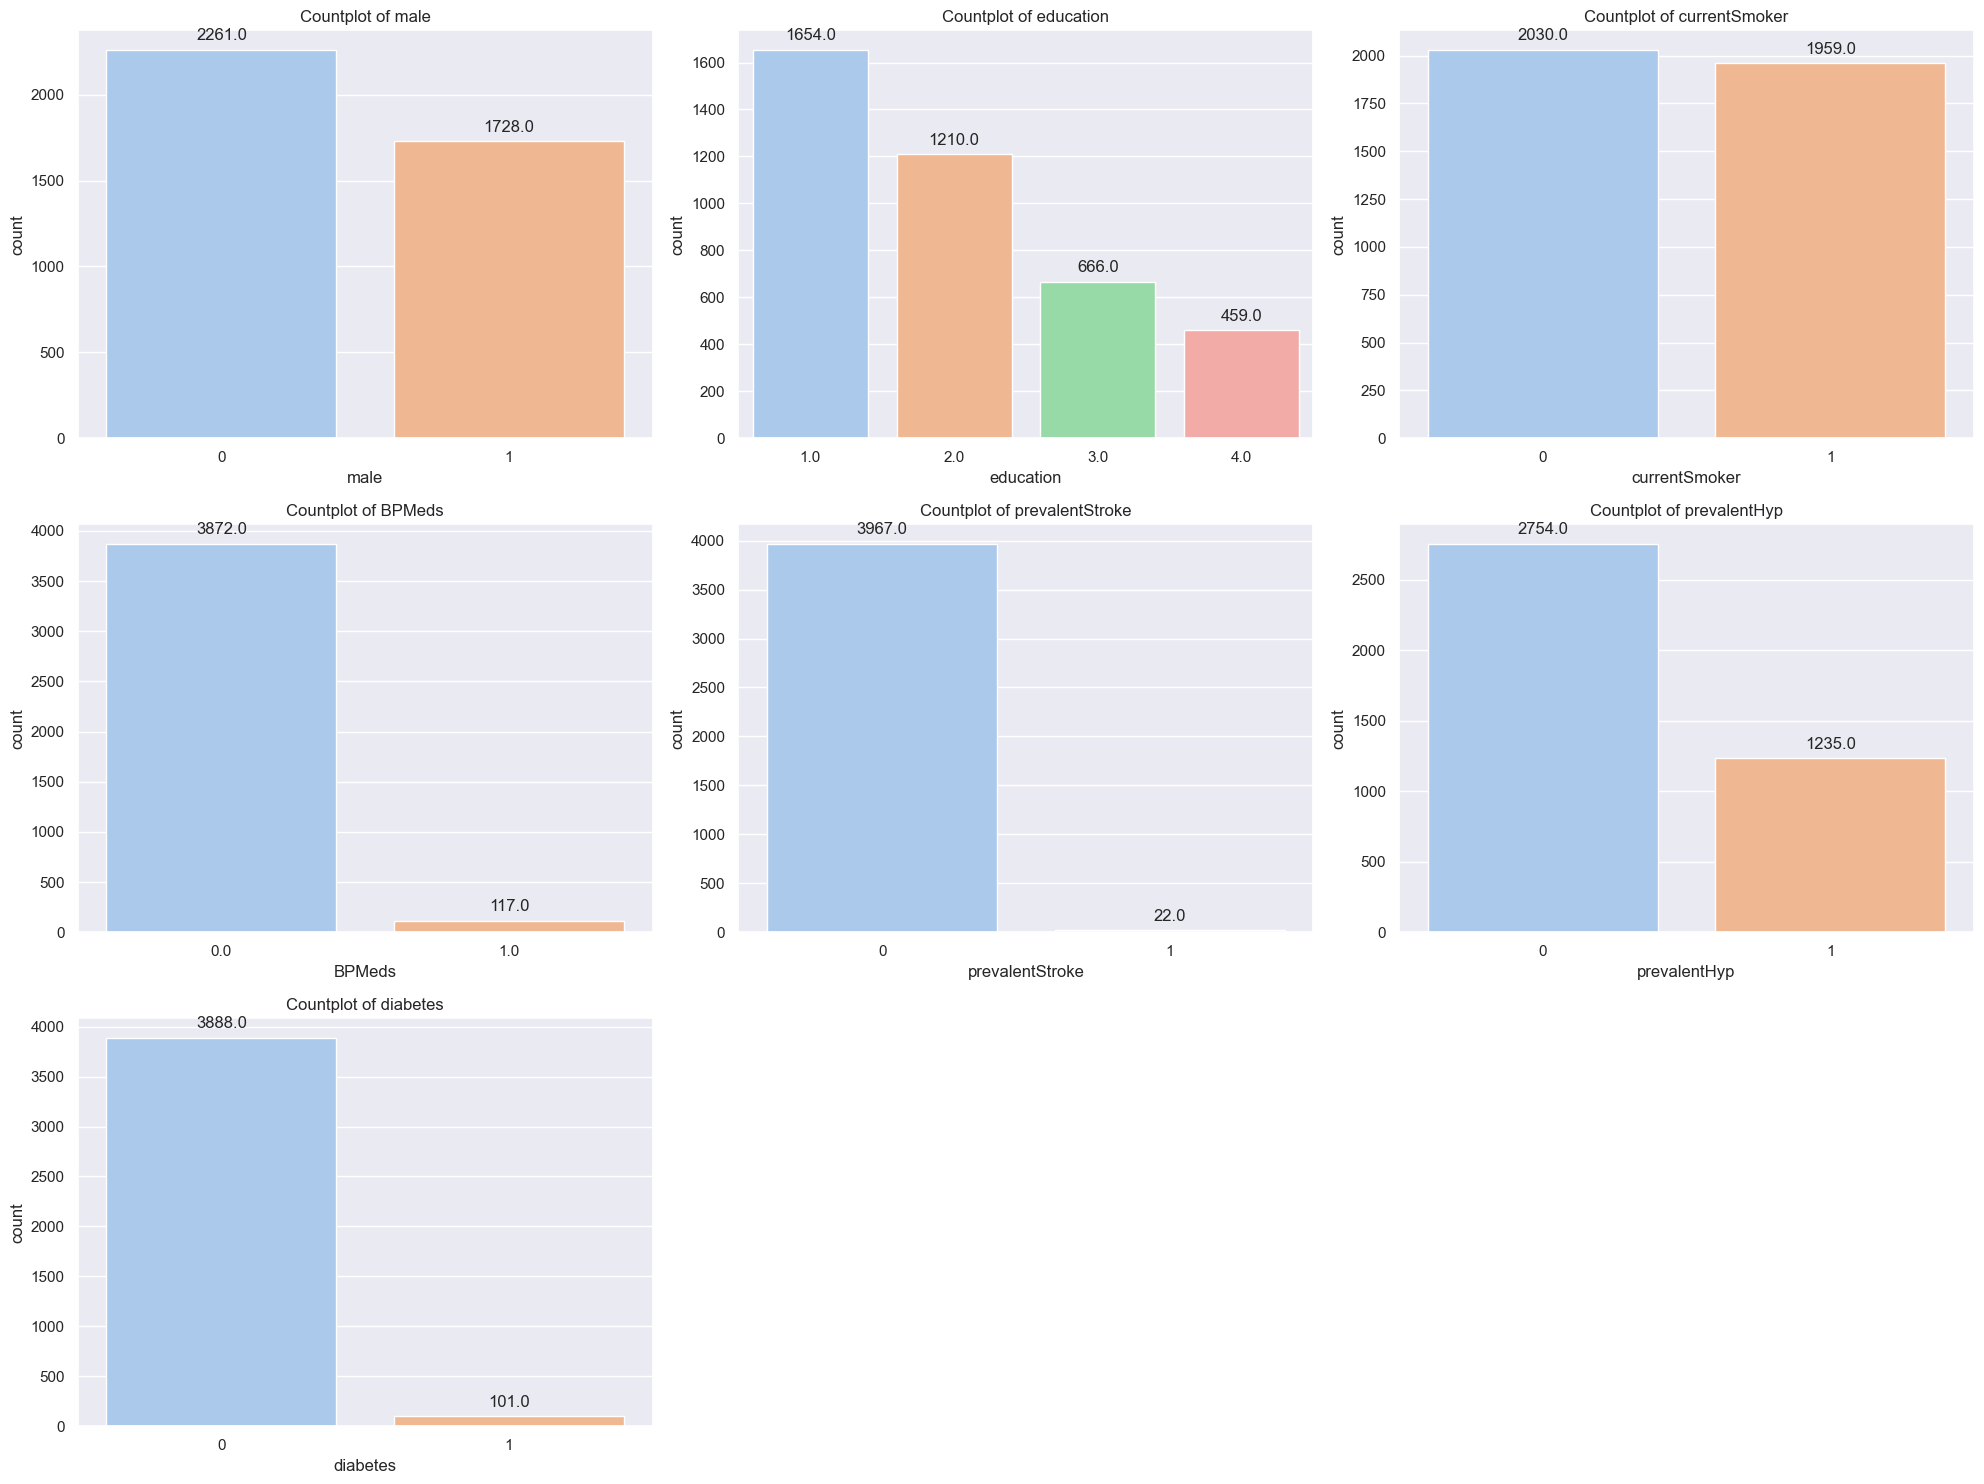

In [8]:
#Visualization of categorical variables
df2 = df.drop(columns=['age','totChol','sysBP','diaBP','BMI','heartRate','TenYearCHD','glucose','cigsPerDay'])

plt.figure(figsize=(20,15))

for i,col in enumerate(df2.columns,1):
    plt.subplot(3,3,i)
    
    unique_vals = sorted(df2[col].unique())
    
    ax = sns.countplot(x=col, data=df2, order=unique_vals)
    
    for p in ax.patches:
        ax.annotate(f'{p.get_height()}',
                    (p.get_x() + p.get_width() /2., p.get_height()),
                    ha = 'center', va='center',
                    xytext=(0,10),
                    textcoords='offset points')
        plt.title(f'Countplot of {col}')
        plt.tight_layout()

plt.show()

We have very imbalanced data in some variables. Theoretically this variables are important for CHD prediction, however, since the objective of the project is not to get more data, and we actually don't know the characteristics and inclusion criteria of the persons the data was taken, I won't look or scrape for new data. On the contrary, probably will be better to ignore some of this categories.

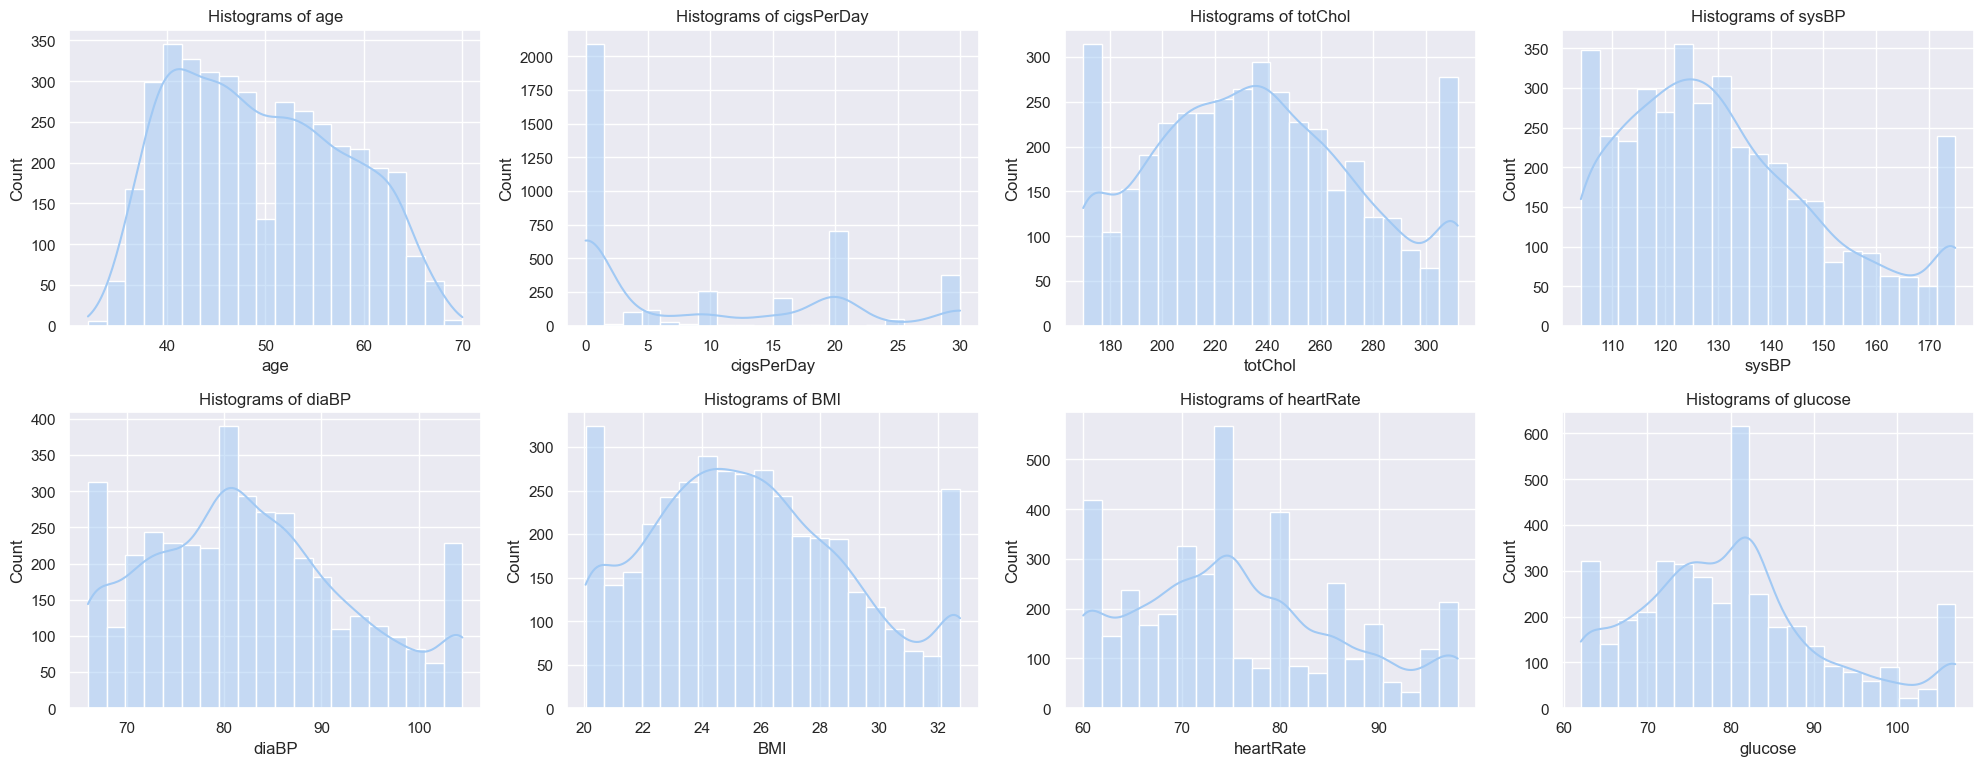

In [9]:
#Visualization of continuous variables.
df3 = df.drop(columns=['TenYearCHD','male','education','currentSmoker','BPMeds','prevalentStroke','prevalentHyp','diabetes'])

plt.figure(figsize=(20,15))
for i,col in enumerate(df3.columns,1):
    plt.subplot(4,4,i)
    sns.histplot(df3[col],kde=True,bins=20)
    plt.title(f'Histograms of {col}')
    plt.tight_layout()
    
plt.show()

There's very uneven data of the continues variables. Most of them probably would have a normal distribution if we would have more data. Also, since we used IQR to deal with outliers, there's somo increments in the tails of the distributions.

## Correlation of variables

Text(0.5, 1.0, 'Correlation beetwen features')

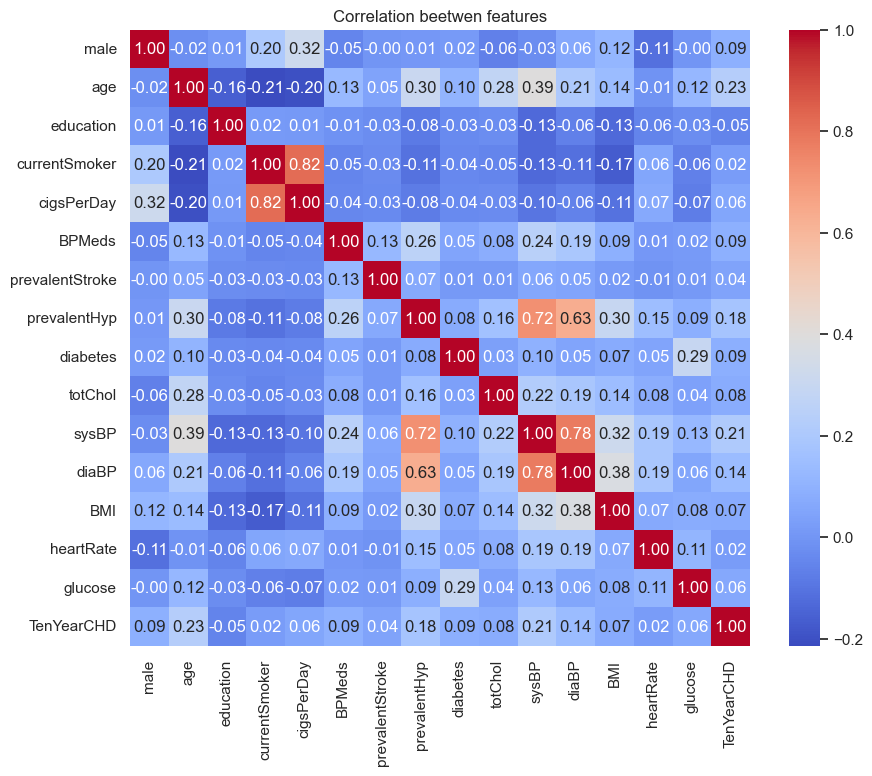

In [10]:
correlation = df.corr()
plt.figure(figsize=(10,8))
sns.heatmap(correlation,annot=True,fmt='.2f',cmap='coolwarm')
plt.title('Correlation beetwen features')

From this heatmap I can make the following observations:
- Being a male is slightly correlated with currently being smoker and therefore with the number of cigarrettes per day.
- Age is inversely correlated with being smoker, so would be interest to see if that implies that older people in the dataset are less likely to be women.
- Age is correlated with several variables known in the medicine to be risk factors for CHD, including TenYearCHD itself.
- Education shows very few correlation with the others features, it seems like the older individuals in the dataset present fewer education degree, this is a characteristic of the population the data was taken.
- Current smoker and CigsPerDay are highly correlated, also CigsPerDay is slightly more correlated to TenYearCHD, seeing the context, Current smoker variable could be dropped off for the prediction model, because CigsPerDay more than 0 implies than it is a Current smoker person.
- Prevalent hypertension has a good correlation with both, diastolic and systolic blood pressure, also those two variables has a good correlation between them.
- Glucose and diabetes is slightly correlated, making assumptions we can think that individuals with diabetes in the dataset are medicated so are in glucose control.

Let's take a look on this.

In the cigsPerDay distribution we can see that most of the values are distrbuted in 5 values ranges, So, for analysis and machine learning purposes, we will turn this variable into a categorical variable by bucketing.

In [11]:
bins = [0, 4, 9, 14, 19, 24, 29, float('inf')]
df['cigsBins'] = pd.cut(df['cigsPerDay'],labels=False, bins=bins, right=False)

## Multivariate analysis

<Figure size 1200x800 with 0 Axes>

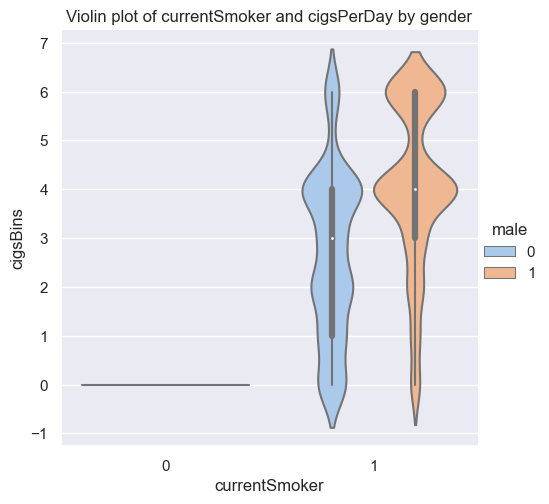

In [12]:
# Correlation between cigsPerDay, currentSmoker distributed by gender.
plt.figure(figsize=(12,8))
sns.catplot(data=df,x='currentSmoker',y='cigsBins',hue='male',kind='violin')
plt.title('Violin plot of currentSmoker and cigsPerDay by gender')
plt.show()

As it can seen, There's not a visually evident difference beetween males and females but It is possible to see that males smokers consume more cigarettes per day tan women.

<Figure size 1200x800 with 0 Axes>

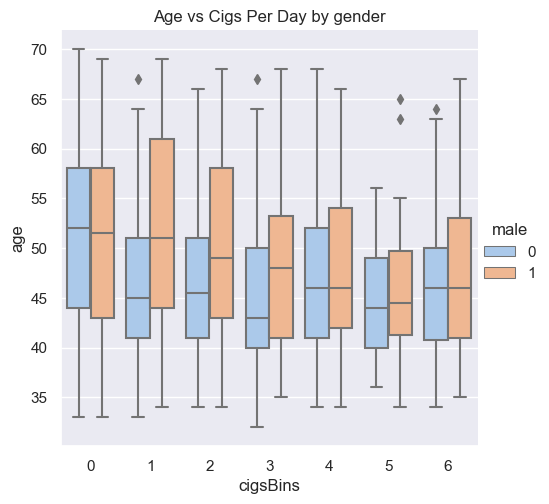

In [13]:
plt.figure(figsize=(12, 8))
sns.catplot(x='cigsBins',y='age',data=df,hue='male', kind='box')
plt.title('Age vs Cigs Per Day by gender')
plt.show()

Even when there is more current smokers males than females, it seems that there's no important differences of ages between those groups.

<Figure size 1200x800 with 0 Axes>

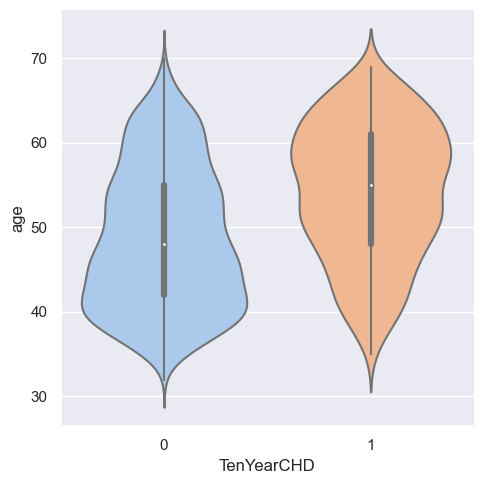

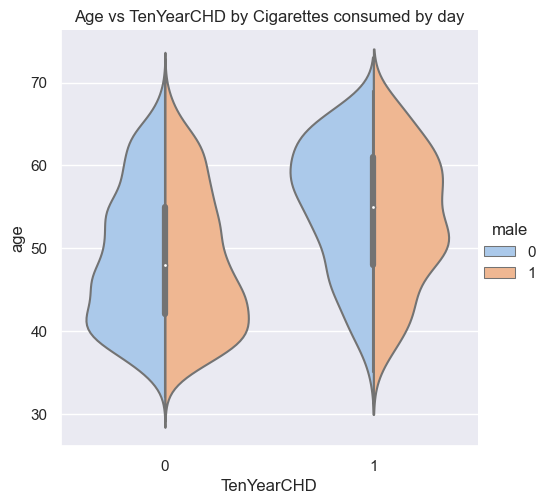

In [14]:
plt.figure(figsize=(12, 8))
sns.catplot(x='TenYearCHD',y='age',data=df, kind='violin')
sns.catplot(x='TenYearCHD',y='age',data=df, kind='violin',hue='male',split=True)
plt.title('Age vs TenYearCHD by Cigarettes consumed by day')
plt.show()

Those comparations shows that the age is inversely correlated to the risk of TenYearCHD but if we separate male from females is noteworthy that males has a peak of risk in the midle age meanwhile women has their peak older.

Conceptually, both, diastolic and systolic blood pressure may be represented by mean arterial pressure, that is, an average calculated blood pressure in an individual during a single cardiac cycle. Let's see the relations between this variables before merging them.

<Figure size 1000x1000 with 0 Axes>

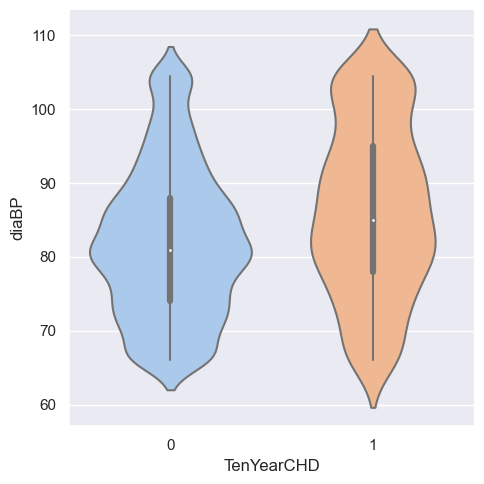

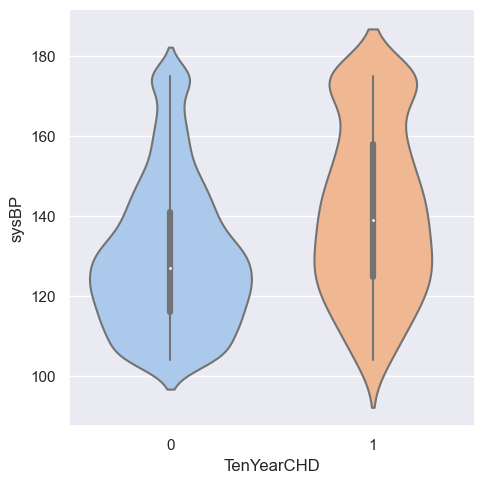

In [15]:
plt.figure(figsize=(10, 10))
sns.catplot(data=df, x='TenYearCHD',y='diaBP',kind='violin')
sns.catplot(data=df, x='TenYearCHD',y='sysBP',kind='violin')
plt.show()

As it showed. The data is very similarly distributed among their values, so, making use of the theory, I will merge both variables in one

<Figure size 1000x1000 with 0 Axes>

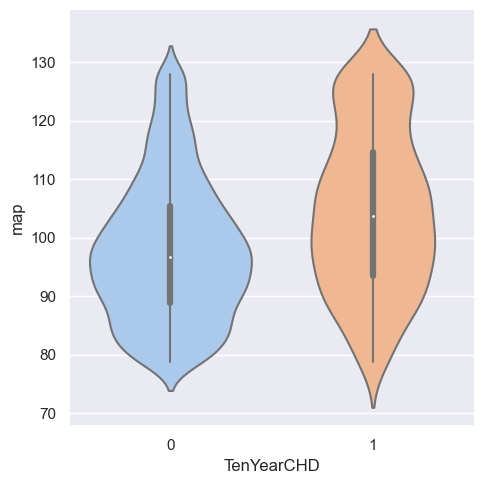

In [16]:
df['map']= round(df['diaBP']+((1/3)*(df['sysBP']-df['diaBP'])),2)
plt.figure(figsize=(10, 10))
sns.catplot(data=df, x='TenYearCHD',y='map',kind='violin')
plt.show()

Visually, the new variable has the same value distribution among both, TenYearCHD class of individuals, than its predecessors.

It is useful to get again the information of the dataset.

In [17]:
df.head()

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD,cigsBins,map
0,1,39,4.0,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0,0,82.00
1,0,46,2.0,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0,0,94.33
2,1,48,1.0,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0,4,95.83
3,0,61,3.0,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,1,6,113.33
4,0,46,3.0,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0,0,4,99.33


## Feature engineering and modelling
I will use some prediction models for baseline prediction and after that, I will use feature engineering in order to get the best results. After that I will compare the results of everything.

### Baseline predictions models.

First, since our target varibale is very imbalanced I will make a SMOTE analysis in order to get a more balanced dataset.


In [18]:

smote = SMOTE(sampling_strategy='not majority', random_state=42)

#Let's make a copy of the dataset without the columns we are not gonna use.
df2 = df.copy()
df2.drop(['cigsPerDay','sysBP','diaBP'], axis=1, inplace=True)
#Let's assign the features.
X_raw = df2.loc[:, df2.columns!= 'TenYearCHD']
y_raw = df2.loc[:,'TenYearCHD']

X_train, X_test, y_train, y_test = train_test_split(X_raw, y_raw, test_size=0.2, random_state=42)

x_s_res, y_s_res = smote.fit_resample(X_train, y_train)

print(y_train.value_counts(), '\n', np.bincount(y_s_res))

TenYearCHD
0    2721
1     470
Name: count, dtype: int64 
 [2721 2721]


In [38]:
gbc = GradientBoostingClassifier()
rf = RandomForestClassifier()
lr = LogisticRegression()
svm_cl = svm.SVC(kernel='linear')
knn_cl = KNeighborsClassifier()

Now lets do some univariate selection of important features.

Since we have a small dataset, I will use different values of k in best k selection in order to get the best result.

In [41]:
f1_score_list = []

for k in range(1,13):
    selector = SelectKBest(score_func=mutual_info_classif, k=k)
    selector.fit(x_s_res, y_s_res)
    
    sel_X_train = selector.transform(x_s_res)
    sel_X_test = selector.transform(X_test)
    gbc.fit(sel_X_train, y_s_res)
    kbest_preds = gbc.predict(sel_X_test)
    
    f1_score_kbest = round(f1_score(y_test, kbest_preds, average = 'weighted'),3)
    f1_score_list.append(f1_score_kbest)

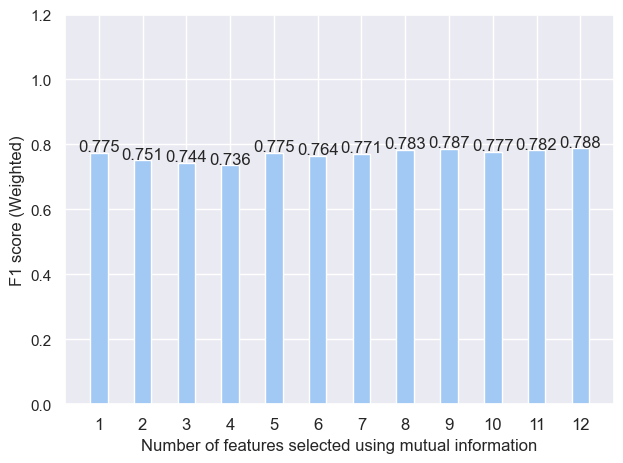

In [42]:
fig, ax = plt.subplots()

x = np.arange(1,13)
y = f1_score_list

ax.bar(x,y, width=0.4)
ax.set_xlabel('Number of features selected using mutual information')
ax.set_ylabel('F1 score (Weighted)')
ax.set_ylim(0,1.2)
ax.set_xticks(np.arange(1,13))
ax.set_xticklabels(np.arange(1,13),fontsize = 12)

for i, v in enumerate(y):
    plt.text(x=i+1, y=v+0.005, s=str(v), ha='center')
    
plt.tight_layout()

With this model We can see the best value of K is 12, so let's run the model and see which ones are those features.

In [43]:
selector = SelectKBest(score_func=mutual_info_classif, k=12)
selector.fit(x_s_res, y_s_res)

select_feature_mask = selector.get_support()

selected_features = x_s_res.columns[select_feature_mask]

df_feat = df2[selected_features]
df_feat = pd.concat([df_feat, df2['TenYearCHD']], axis=1)
df_feat.head()

,age,education,currentSmoker,BPMeds,prevalentHyp,diabetes,totChol,BMI,heartRate,glucose,cigsBins,map,TenYearCHD
0,39,4.0,0,0.0,0,0,195.0,26.97,80.0,77.0,0,82.00,0
1,46,2.0,0,0.0,0,0,250.0,28.73,95.0,76.0,0,94.33,0
2,48,1.0,1,0.0,0,0,245.0,25.34,75.0,70.0,4,95.83,0
3,61,3.0,1,0.0,1,0,225.0,28.58,65.0,103.0,6,113.33,1
4,46,3.0,1,0.0,0,0,285.0,23.10,85.0,85.0,4,99.33,0


As an observation. Most of the projects that can we found online with framingham dataset drop education feature with the assumption that is not important in the context. Actually, education IS important in the health care context. It is known that there's a tendecy of being more strict with the medication intake and in most of the countries determine a different lifestyle

In [44]:
#Let's test all the different models

X_feat = df_feat.drop('TenYearCHD', axis=1)
y_feat = df_feat['TenYearCHD']

X_train2, X_test2, y_train2, y_test2 = train_test_split(X_feat, y_feat, test_size=0.2, random_state=42)

#Let's do SMOTE analysis to this data too because we selected the features with SMOTE analysis processed data.

x_s_res2, y_s_res2 = smote.fit_resample(X_train2, y_train2)

# fitting models
# Gradient Booster Classifier
gbc.fit(x_s_res2, y_s_res2)
gbc_pred = gbc.predict(X_test2)

#RandomForestClassifier
rf.fit(x_s_res2, y_s_res2)
rf_pred = rf.predict(X_test2)

#LogisticRegression
lr.fit(x_s_res2, y_s_res2)
lr_pred = lr.predict(X_test2)

#Support Vector Machines
svm_cl.fit(x_s_res2, y_s_res2)
svm_pred = svm_cl.predict(X_test2)

#KNN
knn_cl.fit(x_s_res2, y_s_res2)
knn_pred = knn_cl.predict(X_test2)

In [45]:
pred_models = [
    ('Gradient Boosting Classifier', gbc_pred),
    ('Random Forest Classifier', rf_pred),
    ('Logistic Regression', lr_pred),
    (' Support Vector Machine Classifier', svm_pred),
    ('K Nearest Neighbors', knn_pred),
]
#Let's calculate metrics for every model.
for model_name, predictions in pred_models:
    print('Model:', model_name)
    print('Accuracy:', accuracy_score(y_test2, predictions))
    print(classification_report(y_test2, predictions))

Model: Gradient Boosting Classifier
Accuracy: 0.8020050125313283
              precision    recall  f1-score   support

           0       0.85      0.93      0.89       673
           1       0.25      0.13      0.17       125

    accuracy                           0.80       798
   macro avg       0.55      0.53      0.53       798
weighted avg       0.76      0.80      0.77       798

Model: Random Forest Classifier
Accuracy: 0.8195488721804511
              precision    recall  f1-score   support

           0       0.85      0.95      0.90       673
           1       0.28      0.10      0.14       125

    accuracy                           0.82       798
   macro avg       0.56      0.52      0.52       798
weighted avg       0.76      0.82      0.78       798

Model: Logistic Regression
Accuracy: 0.6453634085213033
              precision    recall  f1-score   support

           0       0.91      0.64      0.75       673
           1       0.25      0.65      0.36       125



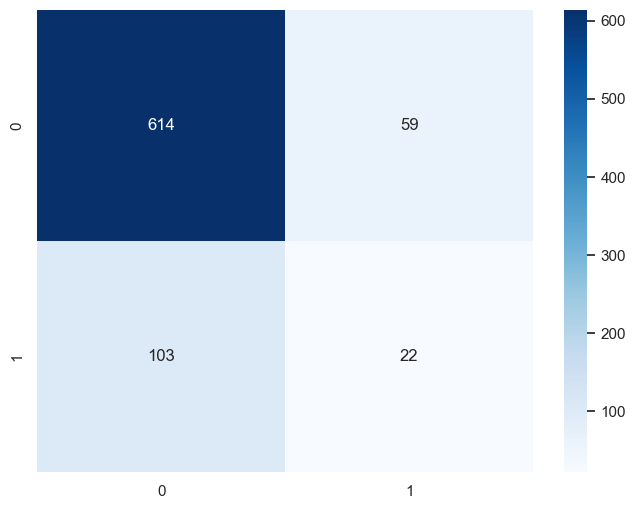

In [25]:
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_matrix(y_test,gbc_pred), annot=True,fmt='d', cmap='Blues')
plt.show()

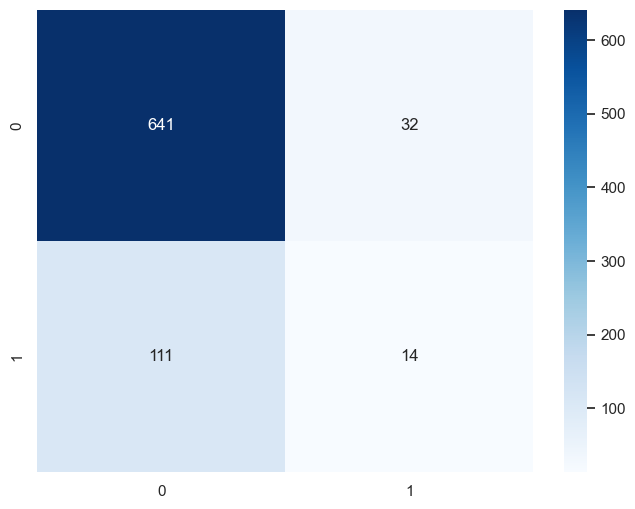

In [26]:
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_matrix(y_test,rf_pred), annot=True,fmt='d', cmap='Blues')
plt.show()

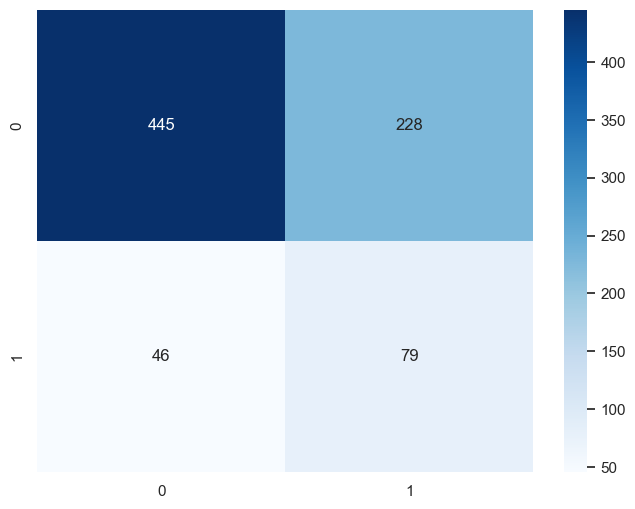

In [27]:
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_matrix(y_test,lr_pred), annot=True,fmt='d', cmap='Blues')
plt.show()

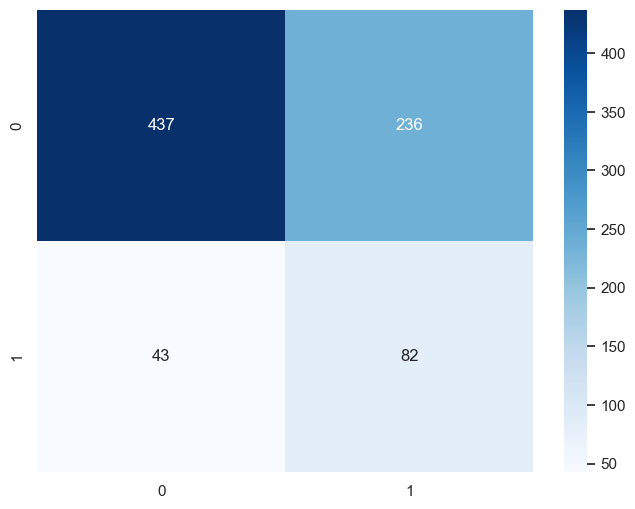

In [28]:
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_matrix(y_test,svm_pred), annot=True,fmt='d', cmap = 'Blues')
plt.show()

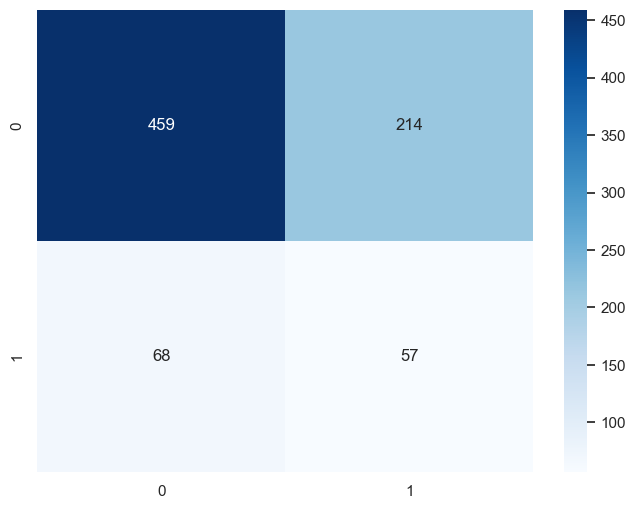

In [46]:
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_matrix(y_test,knn_pred), annot=True,fmt='d', cmap='Blues')
plt.show()

It seems that support vector machine is the best option for this project followed by logistic regression. That is beacuase we get better recall. Even with less precision, in healthcare is important recall because is worst to have a sick patient not diagnosed that a healthy patient studied because of the risk. However, precision is importatn too because a low precision induces more expenses in innecesary studies and treatments.

Let's see now the Area Under the Curve (AUC). This is a measure of performance based on plotting the true positive and false positive rate and calculating the area of that curve. The closer the score to 1 the better the algorithm's ability to distinguish between the two outcomes.

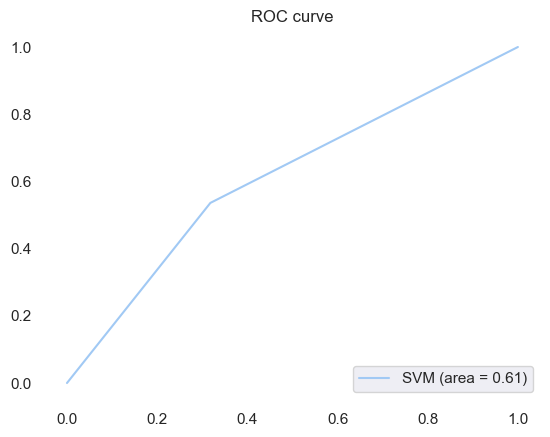

The score for the AUC ROC Curve is: 60.9%


In [49]:
fpr,tpr, _ = roc_curve(y_test,svm_pred)
auc = roc_auc_score(y_test,svm_pred)
plt.plot(fpr,tpr,label='SVM (area = %0.2f)' % auc)
plt.legend(loc=4)
plt.box(False)
plt.title('ROC curve')
plt.show()

print(f"The score for the AUC ROC Curve is: {round(auc,3)*100}%")
